In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np

In [7]:
tr_dp = '/content/drive/MyDrive/ML/mnist_train.csv'
ts_dp = '/content/drive/MyDrive/ML/mnist_test.csv'

In [8]:
d_tr = pd.read_csv(tr_dp)
d_ts = pd.read_csv(ts_dp)

In [9]:
print(" Here is the sample data for both the datasets (training and testing )")
print("\n TRAINING DATA SET\n")
print(d_tr.head(10))
print("\n TEST DATA SET\n")
print(d_ts.head(10))

 Here is the sample data for both the datasets (training and testing )

 TRAINING DATA SET

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   
5      2    0    0    0    0    0    0    0    0    0  ...      0      0   
6      1    0    0    0    0    0    0    0    0    0  ...      0      0   
7      3    0    0    0    0    0    0    0    0    0  ...      0      0   
8      1    0    0    0    0    0    0    0    0    0  ...      0      0   
9      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0   

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.countplot(x = 'label', data = d_tr)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.countplot(x = 'label', data = d_ts)
plt.show()

In [ ]:
d_tr= d_tr.drop(columns=['label'])
d_tr.describe()

In [ ]:
corr_mat = d_tr.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, cmap = 'Accent', center = 0)

In [145]:
# Here we are converting the dataframes into the  numpy arrays
# for the process of clustering (so as to store image in a single 1D array)
d_tr = pd.read_csv(tr_dp)
X = d_tr.values
# As we have labels, so we will remove the first column of our dataset X
X = X[:, 1:]

In [146]:
# In order to achieve the better results, lets normalize the data we have,
 # Normalizing the data points so that they fall in the range [0,1]
n_cpt = int(input("Please enter the desired number of principal components you want in PCA:- "))
k_clust = int(input("Please enter the desired number of clusters you want after PCA:- "))

Please enter the desired number of principal components you want in PCA:- 128
Please enter the desired number of clusters you want after PCA:- 4


In [147]:
print(X)
print(np.shape(X))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(60000, 784)


In [148]:
# Perform Singular Value Decomposition of the calculated Covariance Matrix
# Here we are using the library for this purpose
from scipy.linalg import svd
U, sing_val, V_trans = svd(X, full_matrices = False)
#Getting the singular values
print(sing_val)
#Designing the singular value Matrix
sing_val_mat = np.diag(sing_val)
print(sing_val_mat)

[3.85502675e+05 1.30874349e+05 1.20811503e+05 1.12183340e+05
 1.04260891e+05 9.42606694e+04 8.65145038e+04 7.74167253e+04
 7.69581680e+04 6.97232331e+04 6.61272739e+04 6.49572514e+04
 5.94152295e+04 5.92384372e+04 5.72089502e+04 5.53554529e+04
 5.30100452e+04 5.16275362e+04 4.94663619e+04 4.86966670e+04
 4.68335879e+04 4.55128331e+04 4.43121641e+04 4.33773242e+04
 4.26497193e+04 4.15688690e+04 4.09292825e+04 4.02215850e+04
 3.91414810e+04 3.77017642e+04 3.68035262e+04 3.65200617e+04
 3.52185422e+04 3.48565800e+04 3.42463961e+04 3.34621623e+04
 3.22562848e+04 3.16794785e+04 3.14709153e+04 3.11819102e+04
 3.06712910e+04 3.02531441e+04 2.94011049e+04 2.86237047e+04
 2.81603293e+04 2.77819974e+04 2.72923695e+04 2.68999335e+04
 2.64777475e+04 2.57800238e+04 2.56764363e+04 2.53844283e+04
 2.46774444e+04 2.45230293e+04 2.41801987e+04 2.36453558e+04
 2.35832221e+04 2.30725588e+04 2.28491077e+04 2.24403138e+04
 2.22635818e+04 2.21896026e+04 2.17723677e+04 2.13500557e+04
 2.09694086e+04 2.068099

In [149]:
sing_val_mat1 = sing_val_mat[0:n_cpt,:n_cpt]
U = U[:,:n_cpt]
V_trans=V_trans[:n_cpt,:]


In [150]:
# Now projecting the given data in matrix X onto the new space of reduced dimensionality
reduced_X = np.dot(U, sing_val_mat1)
org_X = np.dot(reduced_X,V_trans)
print("Therefore we have the projected data points onto a new sample space:-\n", reduced_X)
print("\n The shape of projected data matrix onto new feature space is:- ",np.shape(reduced_X))

Therefore we have the projected data points onto a new sample space:-
 [[1657.04994779  -47.45183439  308.30484216 ...  -40.08712885
    64.05597031    5.92625769]
 [1753.50134925  935.57155719  308.09585585 ...   -1.94382225
   -20.38801887   10.59082153]
 [ 800.82830458  337.51707576 -376.98734004 ...    5.93822238
   -16.03806261  -12.22636333]
 ...
 [1251.45316728 -142.12384764 -161.65538915 ...   63.83488172
    60.60998237   36.67728859]
 [1118.7208112   327.74056266   14.82987948 ...  -39.33728651
    48.71950382  -18.29428735]
 [1171.15316406 -133.70410776   21.41275109 ...  -36.025643
    -9.08655882 -104.73032776]]

 The shape of projected data matrix onto new feature space is:-  (60000, 128)


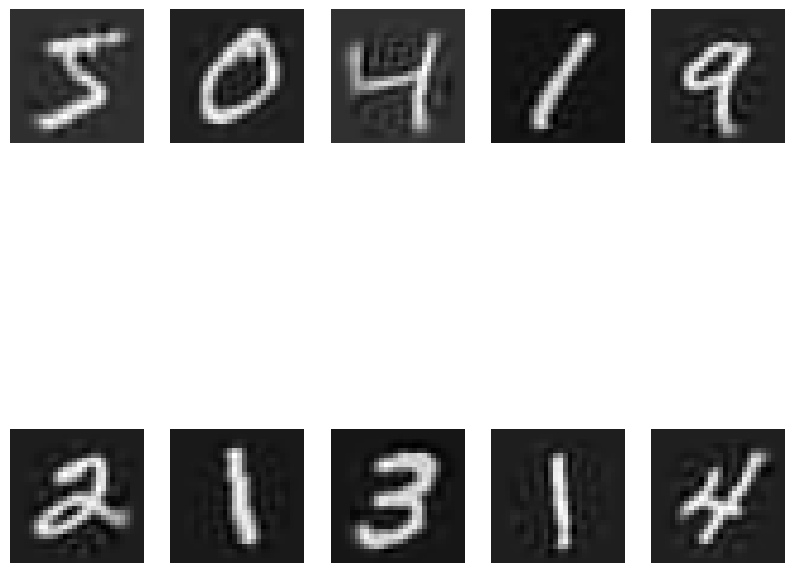

In [151]:
# In this section, we are trying to visualise the images after performing PCA
import matplotlib.pyplot as plt
num_img, num_img_in_row = 10,5
num_row = (num_img + num_img_in_row - 1) // num_img_in_row
fig = plt.figure(figsize = (10,10))
for i in range(num_img):
    image = org_X[i].reshape(28,28)
    ax= fig.add_subplot(num_row,num_img_in_row, i+1)
    ax.imshow(image, cmap='gray')
    ax.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [152]:
# Now we will do Gaussian Mixture Models using inbuilt library
from sklearn.mixture import GaussianMixture as GM
mixing_gm = GM(n_components = k_clust) #Applying GMM Method in this step
mixing_gm.fit(reduced_X)
clasfn = mixing_gm.predict(reduced_X)


For 128 number of components in PCA and 4 number of clusters we have:- 


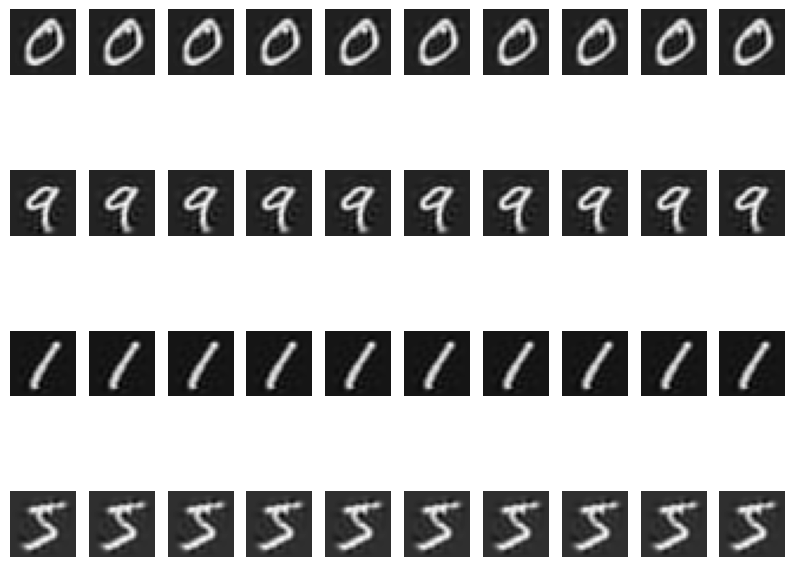

In [153]:
#Now after performing PCA and GMM, lets visualise how the cluster are looking now
print(f"For {n_cpt} number of components in PCA and {k_clust} number of clusters we have:- " )
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
for i in range(k_clust):
    images_of_cluster = org_X[clasfn == i]
    for j in range(min(10,images_of_cluster.shape[0])):
      plt.subplot(k_clust,10,i*10+j+1)
      plt.imshow(images_of_cluster[0].reshape(28,28),cmap="gray")
      plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()